# Task 2

In [1]:
import numpy as np
from agent import *
from gridworld import *
from policy import *
from matplotlib import pyplot as plt
plt.style.use('dark_background')
%matplotlib inline


def average(Gs, shift=0.2):
    Gs_avr = []
    G_avr = Gs[0]
    for G in Gs:
        G_avr = shift * G + (1 - shift) * G_avr
        Gs_avr.append(G_avr)
    return Gs_avr

    
def plot(Gs, Ts):
    Gs = average(Gs)
    plt.title('Returns over Episodes')
    plt.plot(range(len(Gs)), Gs)
    plt.xlabel('Episodes')
    plt.ylabel('Smoothed Returns')
    plt.show()
    plt.title('Returns over Time')
    plt.plot(Ts, Gs)
    plt.xlabel('Time')
    plt.ylabel('Smoothed Returns')
    plt.show()


env = Labyrinth()

RETURN 984.5: 100%|██████████████████████████████████████████████████| 100/100 [00:00<00:00, 386.62it/s]


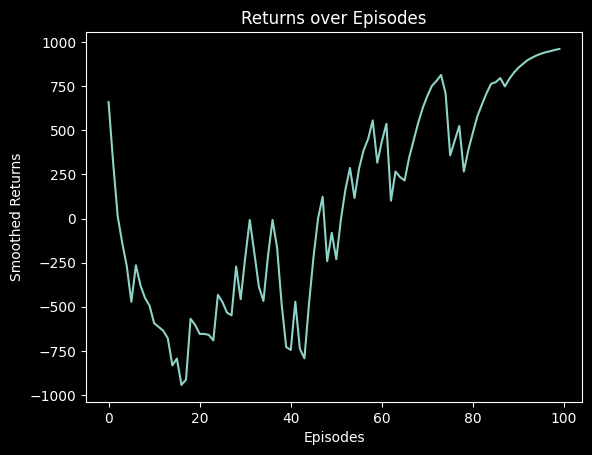

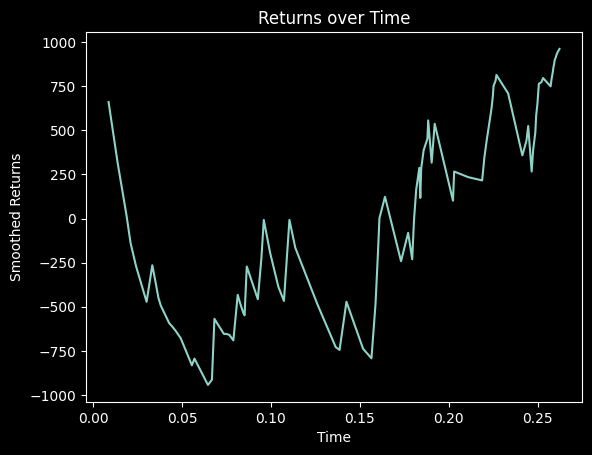

In [2]:
env.seed(42)

sarsa  = TabularSarsa(env, policy=EpsilonGreedy, alpha=0.3, gamma=0.99, N=1)
Gs, Ts = sarsa.train(episodes=100, render={'mode': None, 'speed': 0})
plot(Gs, Ts)

 31%|████████████████████▍                                             | 31/100 [00:01<00:02, 23.35it/s]/home/mortimer/Documents/Studium/DRL/homework/hw3 2023/policy.py:39: RuntimeWarning: overflow encountered in exp
  exp = np.exp(Qs) ** (1/self.temperatur)
/home/mortimer/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
RETURN 945.5: 100%|███████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.61it/s]


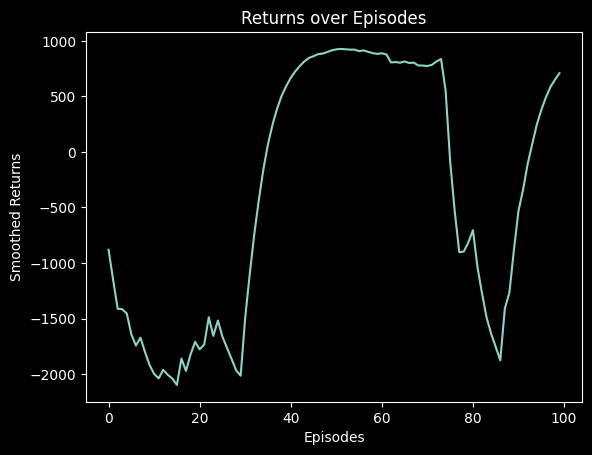

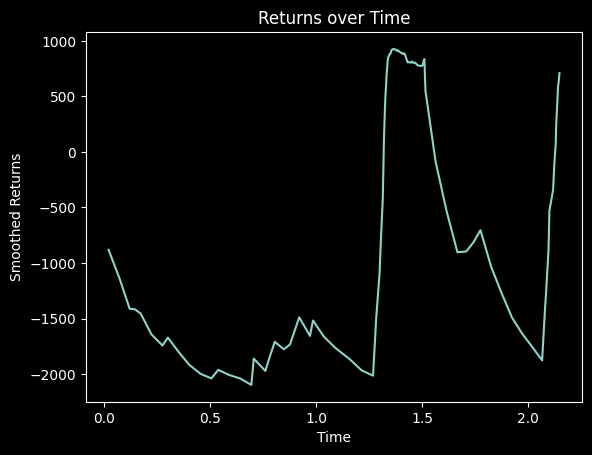

In [3]:
env.seed(42)

mc     = TabularMC(env, policy=Softmax, alpha=0.3, gamma=0.99)
Gs, Ts = mc.train(episodes=100, render={'mode': None, 'speed': 0})
    
plot(Gs, Ts)

# Task 3

In [4]:
# RESET AGENTS
np.random.seed(42)
env.seed(42)

sarsa = TabularSarsa(env, policy=EpsilonGreedy, alpha=0.3, gamma=0.99, N=1)
sarsa.train(episodes=50, render={'mode': None, 'speed': 0})
mc = TabularMC(env, policy=Softmax, alpha=0.3, gamma=0.99)
mc.train(episodes=50, render={'mode': None, 'speed': 0})

sarsa_Q = sarsa.Q.copy()
mc_Q    = mc.Q.copy()

O_fix = (9, 5) # First Teleporter
A_fix = 0      # North

sarsa.fixed = (O_fix, A_fix)
mc.fixed    = (O_fix, A_fix)

sarsa_Qs = []
for _ in range(100):
    sarsa.Q = sarsa_Q.copy()
    sarsa_Qs.append(sarsa.train(episodes=1000, render={'mode': None, 'speed': 0}))

mc_Qs = []
for _ in range(100):
    mc.Q = mc_Q.copy()
    mc_Qs.append(mc.train(episodes=1000, render={'mode': None, 'speed': 0}))

RETURN 875.0: 100%|████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 584.65it/s]


RETURN -515.0: 100%|███████████████████████████████████████████████| 1000/1000 [00:04<00:00, 228.86it/s]


RETURN 856.5: 100%|████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 211.05it/s]


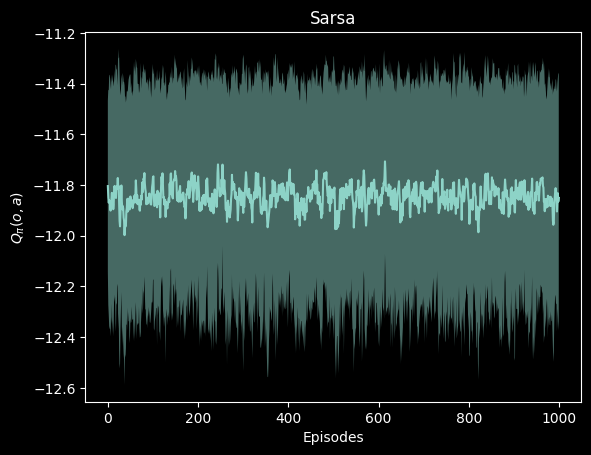

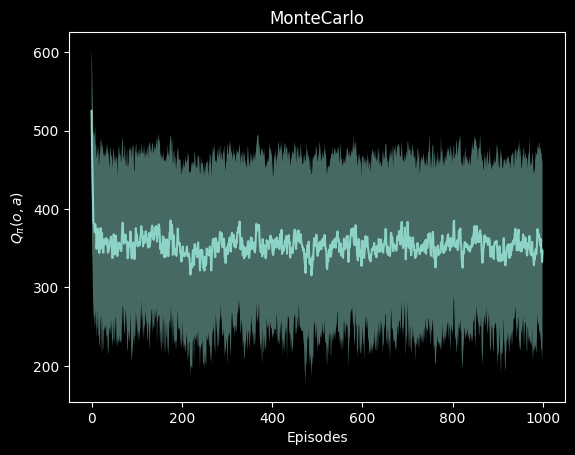

In [5]:
sarsa_Qs = np.array(sarsa_Qs)
mc_Qs    = np.array(mc_Qs)

sarsa_Q_avr   = sarsa_Qs.mean(axis=0)
sarsa_Q_std   = sarsa_Qs.std(axis=0)
sarsa_Q_upper = sarsa_Q_avr + sarsa_Q_std
sarsa_Q_lower = sarsa_Q_avr - sarsa_Q_std

mc_Q_avr  = mc_Qs.mean(axis=0)
mc_Q_std  = mc_Qs.std(axis=0)
mc_Q_upper = mc_Q_avr + mc_Q_std
mc_Q_lower = mc_Q_avr - mc_Q_std

x = range(1000)

plt.title('Sarsa')
plt.fill_between(x, sarsa_Q_upper, sarsa_Q_lower, alpha=0.5)
plt.plot(x, sarsa_Q_avr)
plt.xlabel('Episodes')
plt.ylabel('$Q_\pi(o, a)$')
plt.show()

plt.title('MonteCarlo')
plt.fill_between(x, mc_Q_upper, mc_Q_lower, alpha=0.5)
plt.plot(x, mc_Q_avr)
plt.xlabel('Episodes')
plt.ylabel('$Q_\pi(o, a)$')
plt.show()

As expected, sarsa updates only bootstrap from their imediate neighboring states which stay fixed in their value leading to minimal variance. For Monte Carlo on the other hand, the full returns are included as the temporal difference target leading to drastic variance.